# Advanced Statistical Analysis

<!--
Author: Molla Samser
Website: https://rskworld.in/
Email: help@rskworld.in
Phone: +91 93305 39277
Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147
-->

This notebook demonstrates advanced statistical analysis visualizations:
- Q-Q plots (Quantile-Quantile plots)
- ECDF (Empirical Cumulative Distribution Function)
- Statistical annotations
- Distribution comparisons with statistical tests
- Statistical summary tables


In [1]:
# Author: Molla Samser
# Website: https://rskworld.in/
# Email: help@rskworld.in
# Phone: +91 93305 39277
# Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest

# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)

# Load data
df = pd.read_csv('../data/sample_data.csv')
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (30, 9)


,age,income,education_years,experience,gender,category,score,sales,region
0,25,45000,12,2,Male,Category A,75,1200,North
1,30,55000,14,5,Female,Category B,82,1500,South
2,35,65000,16,8,Male,Category A,88,1800,East
3,28,48000,13,3,Female,Category C,70,1100,West
4,32,60000,15,6,Male,Category B,85,1700,North


## 1. Q-Q Plots (Quantile-Quantile Plots)


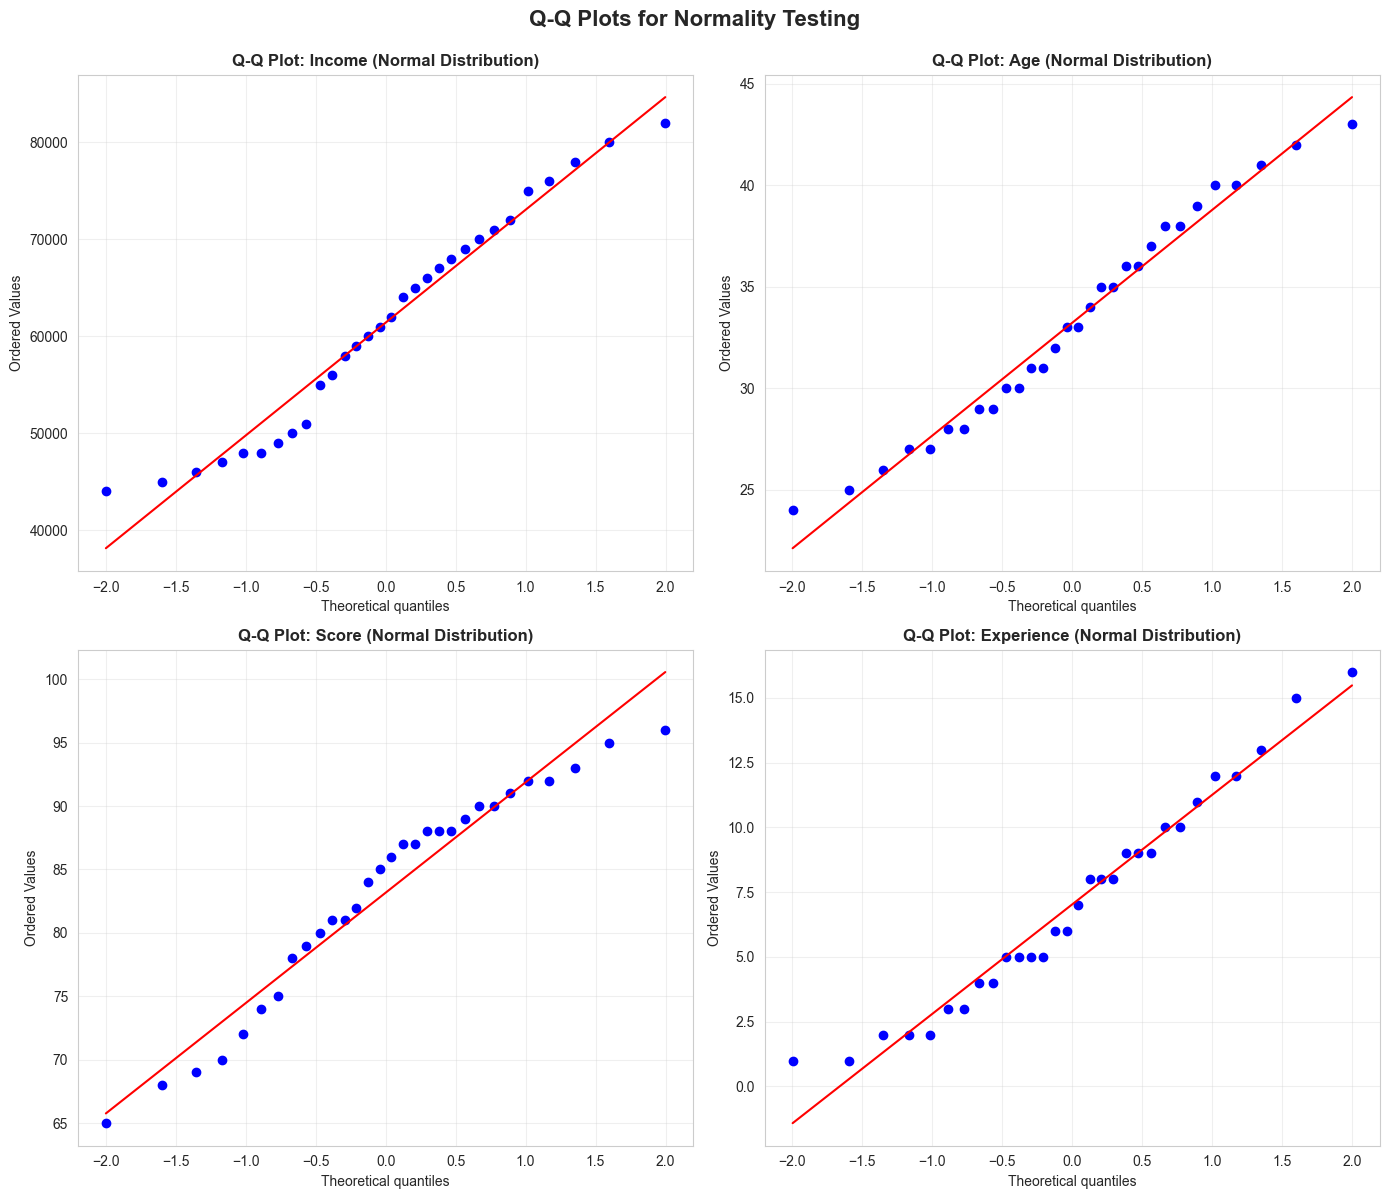

In [2]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Q-Q plot to check normality
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Income Q-Q plot
stats.probplot(df['income'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot: Income (Normal Distribution)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Age Q-Q plot
stats.probplot(df['age'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot: Age (Normal Distribution)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Score Q-Q plot
stats.probplot(df['score'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Score (Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Experience Q-Q plot
stats.probplot(df['experience'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Experience (Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Q-Q Plots for Normality Testing', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/qq_plots.png', dpi=300, bbox_inches='tight')
plt.show()


## 2. ECDF (Empirical Cumulative Distribution Function)


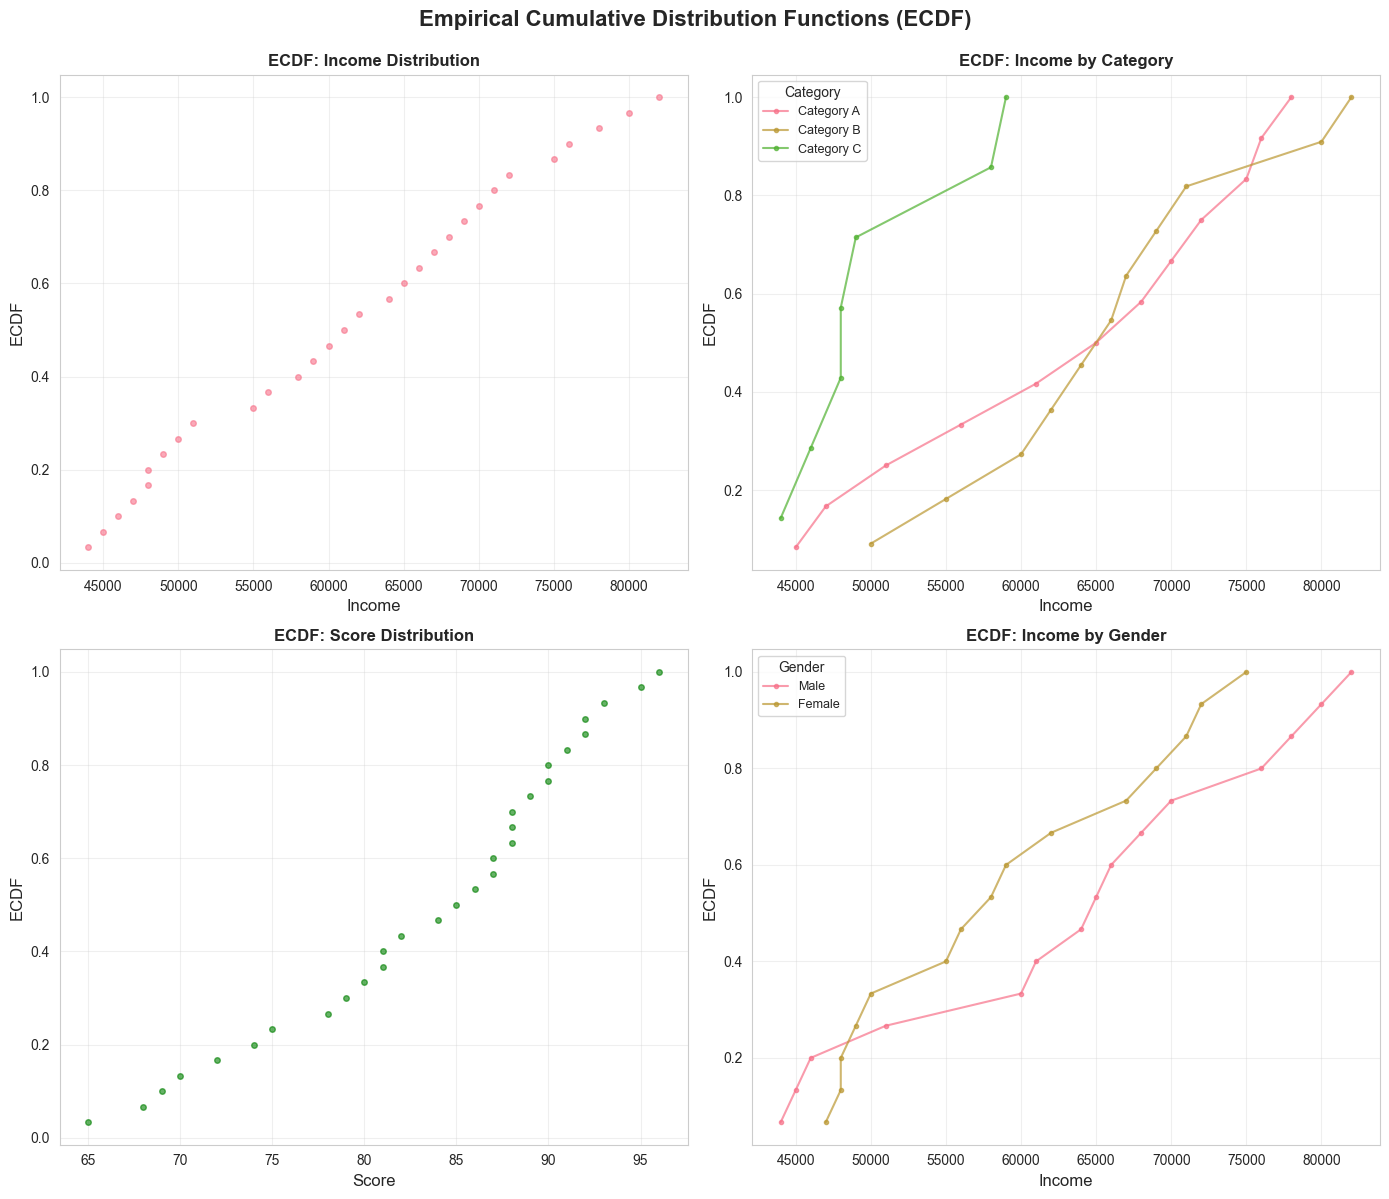

In [3]:
# Author: Molla Samser
# Website: https://rskworld.in/

# ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Create ECDF plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Income ECDF
x_income, y_income = ecdf(df['income'])
axes[0, 0].plot(x_income, y_income, marker='.', linestyle='none', markersize=8, alpha=0.6)
axes[0, 0].set_xlabel('Income', fontsize=12)
axes[0, 0].set_ylabel('ECDF', fontsize=12)
axes[0, 0].set_title('ECDF: Income Distribution', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# ECDF by category
for category in df['category'].unique():
    x, y = ecdf(df[df['category'] == category]['income'])
    axes[0, 1].plot(x, y, marker='.', linestyle='-', label=category, alpha=0.7)
axes[0, 1].set_xlabel('Income', fontsize=12)
axes[0, 1].set_ylabel('ECDF', fontsize=12)
axes[0, 1].set_title('ECDF: Income by Category', fontsize=12, fontweight='bold')
axes[0, 1].legend(title='Category', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Score ECDF
x_score, y_score = ecdf(df['score'])
axes[1, 0].plot(x_score, y_score, marker='.', linestyle='none', markersize=8, alpha=0.6, color='green')
axes[1, 0].set_xlabel('Score', fontsize=12)
axes[1, 0].set_ylabel('ECDF', fontsize=12)
axes[1, 0].set_title('ECDF: Score Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# ECDF by gender
for gender in df['gender'].unique():
    x, y = ecdf(df[df['gender'] == gender]['income'])
    axes[1, 1].plot(x, y, marker='.', linestyle='-', label=gender, alpha=0.7)
axes[1, 1].set_xlabel('Income', fontsize=12)
axes[1, 1].set_ylabel('ECDF', fontsize=12)
axes[1, 1].set_title('ECDF: Income by Gender', fontsize=12, fontweight='bold')
axes[1, 1].legend(title='Gender', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Empirical Cumulative Distribution Functions (ECDF)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/ecdf_plots.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Statistical Tests and Annotations


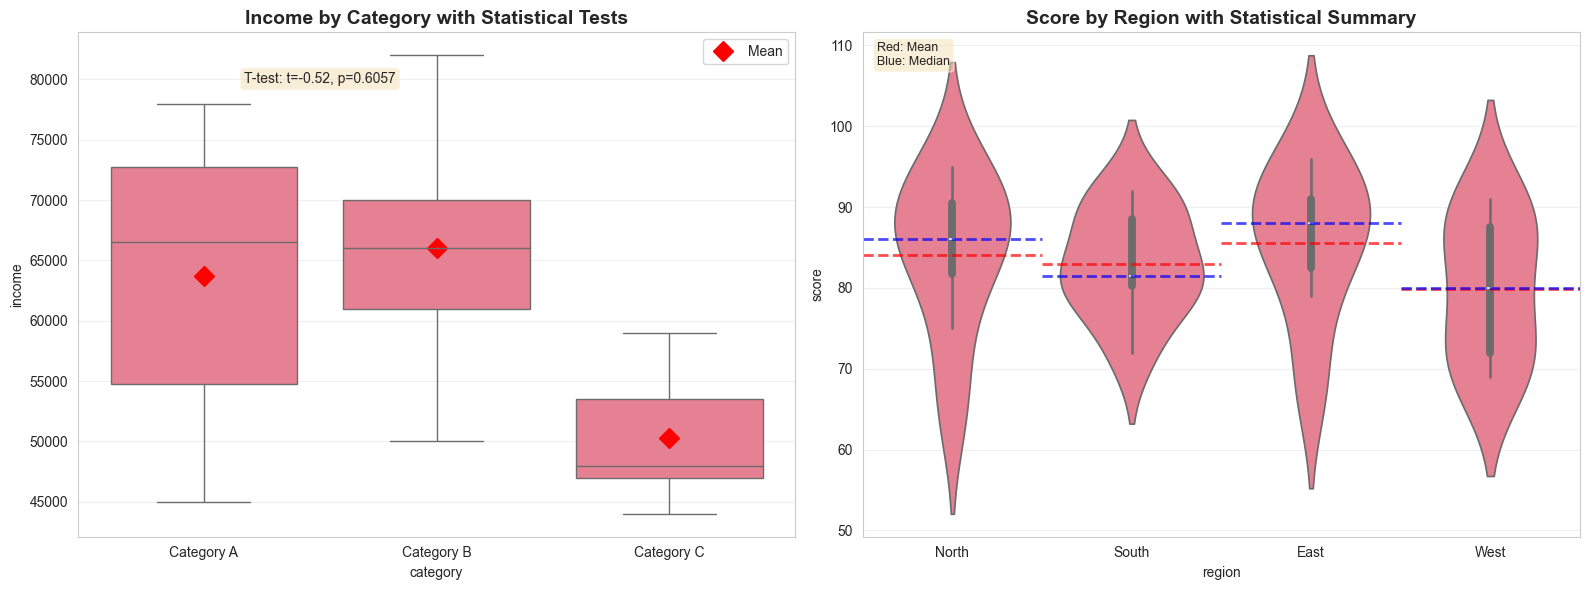

In [4]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Perform statistical tests and add annotations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot with statistical annotations
sns.boxplot(data=df, x='category', y='income', ax=axes[0])
axes[0].set_title('Income by Category with Statistical Tests', fontsize=14, fontweight='bold')

# Add mean markers
means = df.groupby('category')['income'].mean()
for i, (cat, mean_val) in enumerate(means.items()):
    axes[0].plot(i, mean_val, 'rD', markersize=10, label='Mean' if i == 0 else '')

# Perform t-test between categories
categories = df['category'].unique()
if len(categories) >= 2:
    cat1_data = df[df['category'] == categories[0]]['income']
    cat2_data = df[df['category'] == categories[1]]['income']
    t_stat, p_value = stats.ttest_ind(cat1_data, cat2_data)
    
    # Add annotation
    axes[0].text(0.5, axes[0].get_ylim()[1] * 0.95, 
                f'T-test: t={t_stat:.2f}, p={p_value:.4f}',
                ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Violin plot with statistical summary
sns.violinplot(data=df, x='region', y='score', ax=axes[1])
axes[1].set_title('Score by Region with Statistical Summary', fontsize=14, fontweight='bold')

# Add mean and median lines
for i, region in enumerate(df['region'].unique()):
    region_data = df[df['region'] == region]['score']
    mean_val = region_data.mean()
    median_val = region_data.median()
    axes[1].axhline(mean_val, xmin=i/len(df['region'].unique()), 
                   xmax=(i+1)/len(df['region'].unique()), 
                   color='red', linestyle='--', linewidth=2, alpha=0.7)
    axes[1].axhline(median_val, xmin=i/len(df['region'].unique()), 
                   xmax=(i+1)/len(df['region'].unique()), 
                   color='blue', linestyle='--', linewidth=2, alpha=0.7)

axes[1].text(0.02, 0.98, 'Red: Mean\nBlue: Median', 
            transform=axes[1].transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../images/statistical_annotations.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Distribution Comparison with Statistical Tests


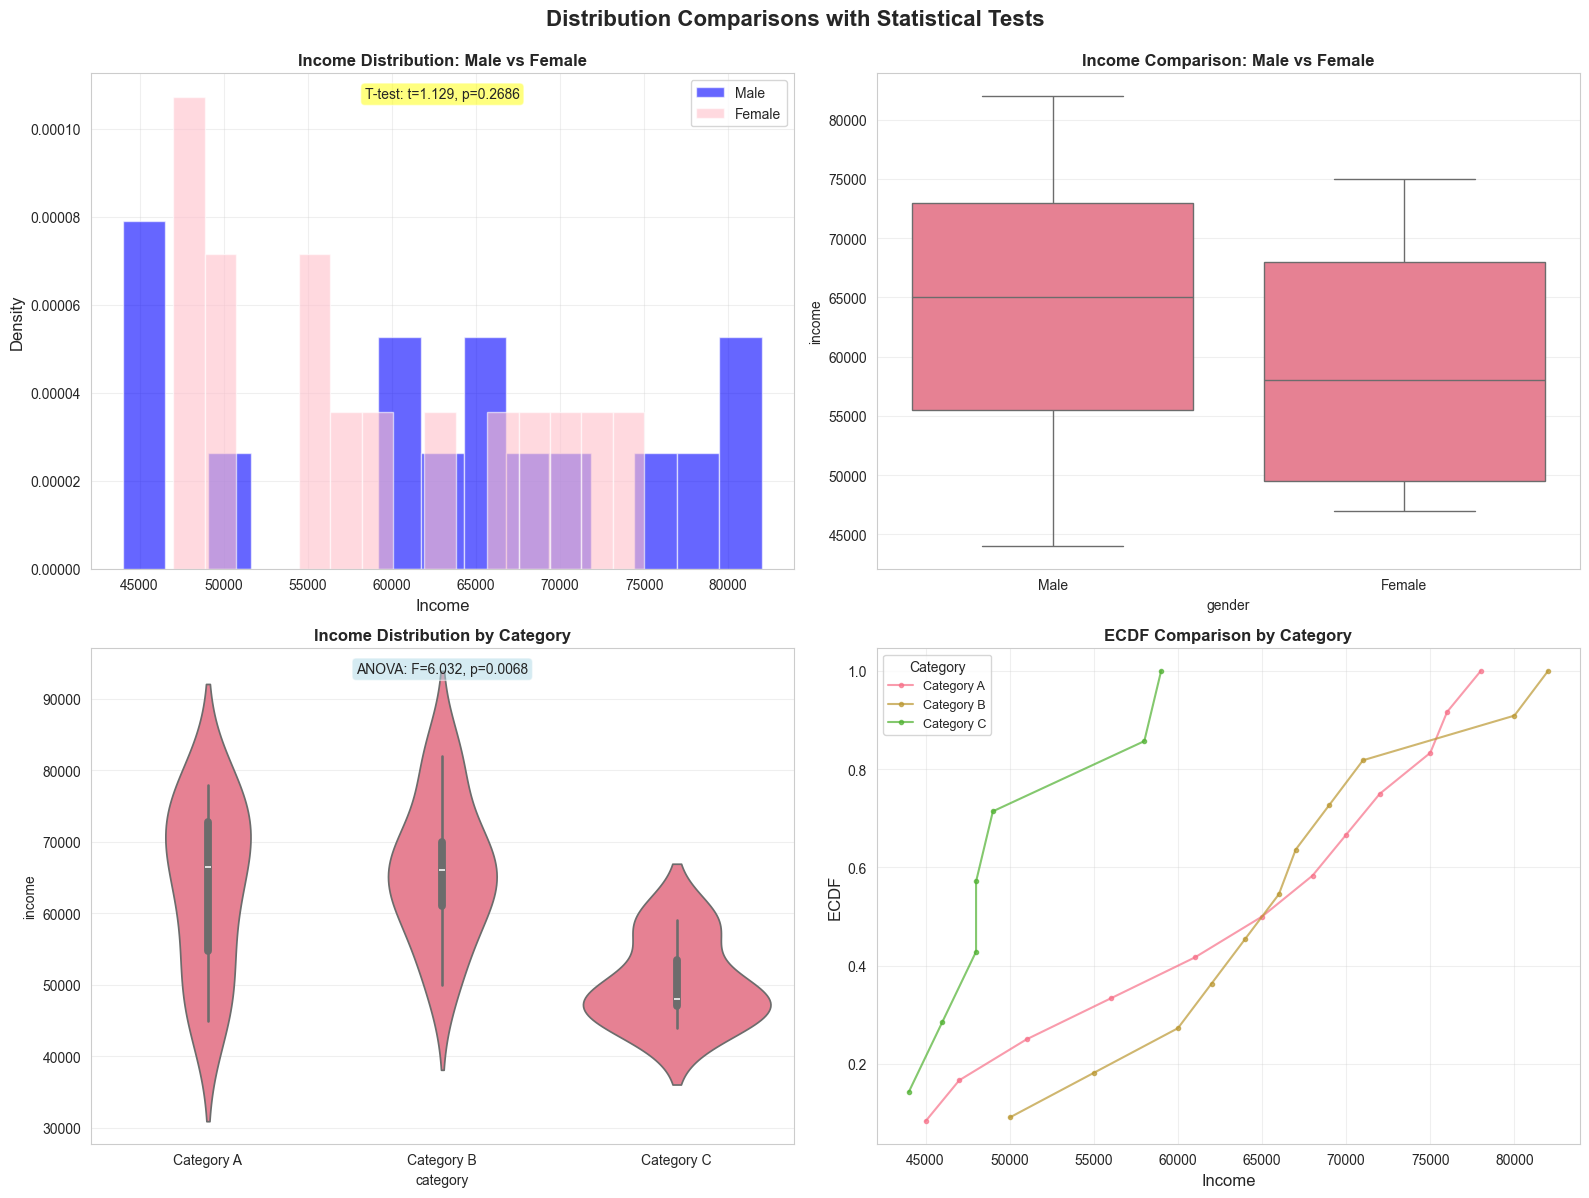

In [5]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Compare distributions with statistical tests
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Compare income by gender
male_income = df[df['gender'] == 'Male']['income']
female_income = df[df['gender'] == 'Female']['income']

# Histogram comparison
axes[0, 0].hist(male_income, bins=15, alpha=0.6, label='Male', color='blue', density=True)
axes[0, 0].hist(female_income, bins=15, alpha=0.6, label='Female', color='pink', density=True)
axes[0, 0].set_xlabel('Income', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].set_title('Income Distribution: Male vs Female', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Perform statistical test
t_stat, p_value = stats.ttest_ind(male_income, female_income)
axes[0, 0].text(0.5, 0.95, f'T-test: t={t_stat:.3f}, p={p_value:.4f}',
               transform=axes[0, 0].transAxes, ha='center',
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Box plot comparison
sns.boxplot(data=df, x='gender', y='income', ax=axes[0, 1])
axes[0, 1].set_title('Income Comparison: Male vs Female', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add statistical significance markers
if p_value < 0.05:
    axes[0, 1].text(0.5, axes[0, 1].get_ylim()[1] * 0.95, 
                   f'* Significant (p={p_value:.4f})', 
                   ha='center', fontsize=10, color='red', fontweight='bold')

# Compare by category
categories = df['category'].unique()
category_data = [df[df['category'] == cat]['income'] for cat in categories]

# Violin plot comparison
sns.violinplot(data=df, x='category', y='income', ax=axes[1, 0])
axes[1, 0].set_title('Income Distribution by Category', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Perform ANOVA
f_stat, p_anova = stats.f_oneway(*category_data)
axes[1, 0].text(0.5, 0.95, f'ANOVA: F={f_stat:.3f}, p={p_anova:.4f}',
               transform=axes[1, 0].transAxes, ha='center',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# ECDF comparison by category
for i, category in enumerate(categories):
    x, y = ecdf(df[df['category'] == category]['income'])
    axes[1, 1].plot(x, y, marker='.', linestyle='-', label=category, alpha=0.7)
axes[1, 1].set_xlabel('Income', fontsize=12)
axes[1, 1].set_ylabel('ECDF', fontsize=12)
axes[1, 1].set_title('ECDF Comparison by Category', fontsize=12, fontweight='bold')
axes[1, 1].legend(title='Category', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Distribution Comparisons with Statistical Tests', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/distribution_comparison_tests.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Statistical Summary Table


COMPREHENSIVE STATISTICAL SUMMARY
       Variable         Mean  Median      Std Dev   Min   Max  Skewness  Kurtosis  Shapiro-Wilk p-value
            age    33.233333    33.0     5.399127    24    43  0.104927 -1.096371              0.452023
         income 61400.000000 61500.0 11376.321447 44000 82000  0.072326 -1.144020              0.212422
education_years    15.400000    15.5     2.372253    12    20  0.189783 -0.779952              0.143036
     experience     7.033333     6.5     4.131321     1    16  0.387716 -0.701341              0.308101
          score    83.166667    85.5     8.574555    65    96 -0.538702 -0.755880              0.117613
          sales  1659.333333  1725.0   395.848572  1000  2400 -0.055847 -1.007283              0.406910



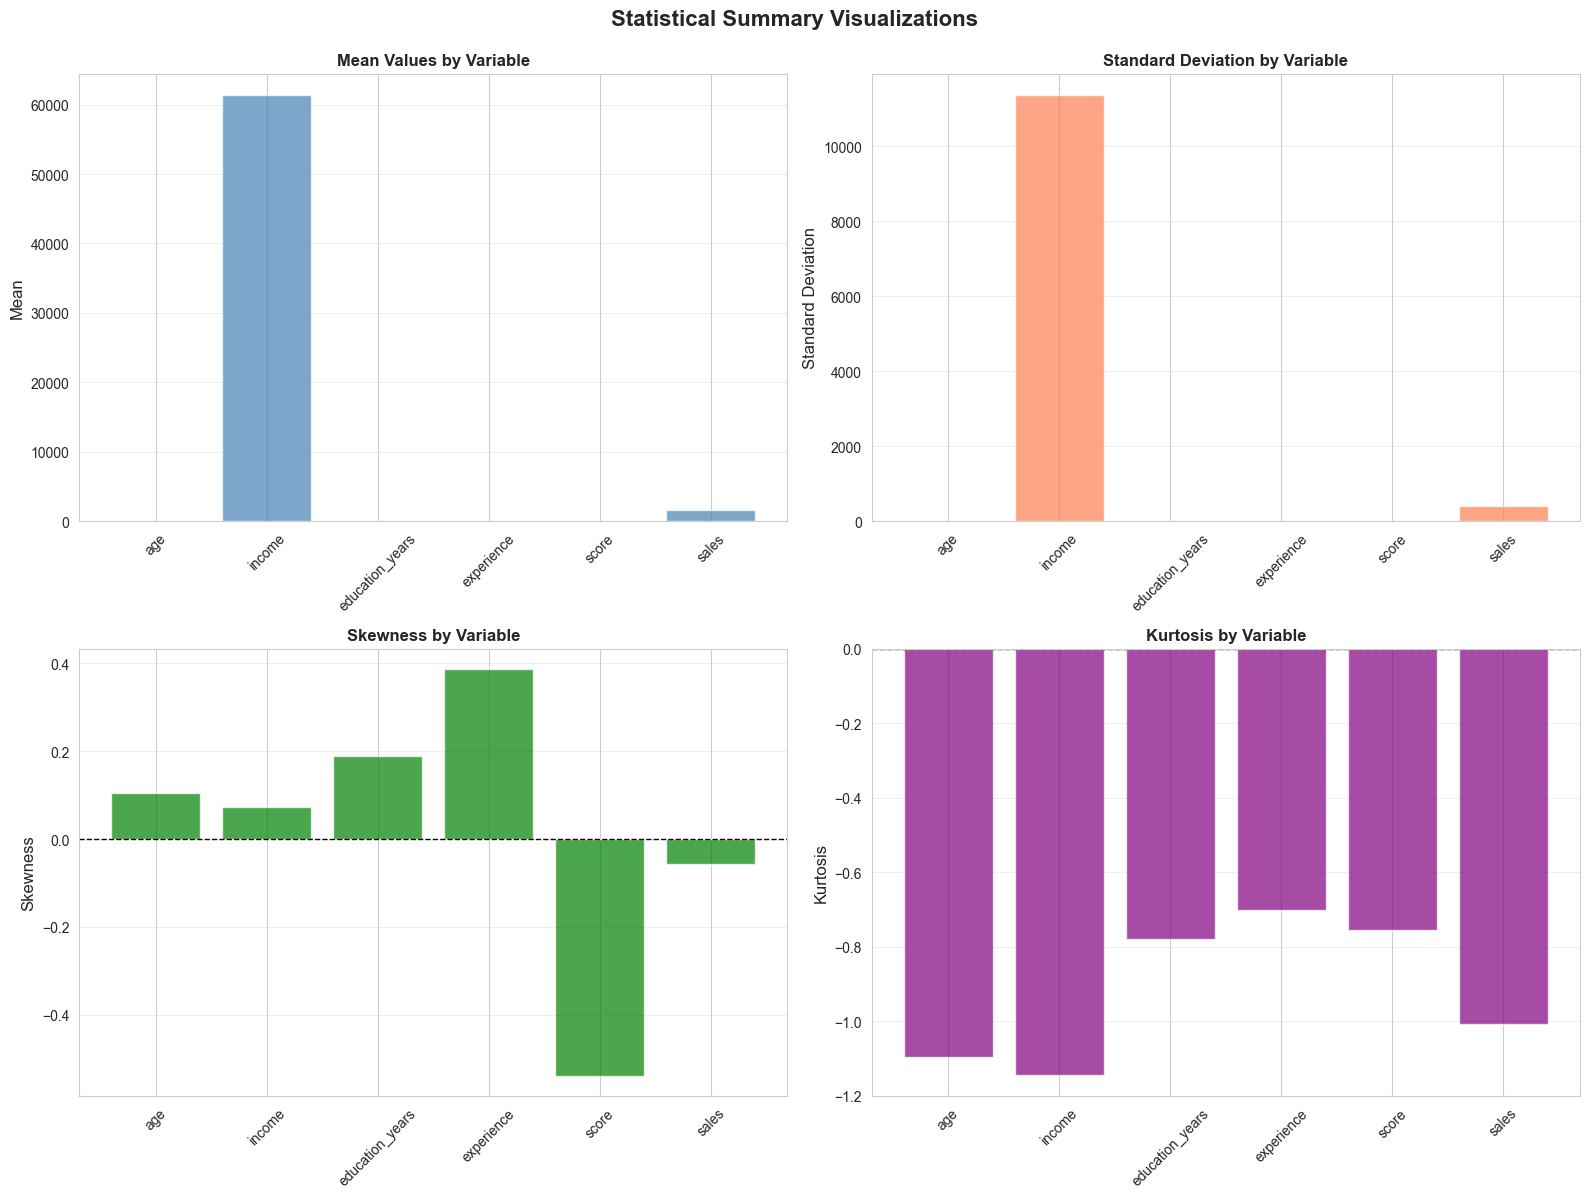

In [6]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Create comprehensive statistical summary
numeric_cols = ['age', 'income', 'education_years', 'experience', 'score', 'sales']
summary_stats = []

for col in numeric_cols:
    data = df[col]
    summary_stats.append({
        'Variable': col,
        'Mean': data.mean(),
        'Median': data.median(),
        'Std Dev': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Skewness': stats.skew(data),
        'Kurtosis': stats.kurtosis(data),
        'Shapiro-Wilk p-value': shapiro(data)[1] if len(data) <= 5000 else np.nan
    })

summary_df = pd.DataFrame(summary_stats)
print("=" * 80)
print("COMPREHENSIVE STATISTICAL SUMMARY")
print("=" * 80)
print(summary_df.to_string(index=False))
print("\n" + "=" * 80)

# Visualize summary statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean comparison
axes[0, 0].bar(summary_df['Variable'], summary_df['Mean'], color='steelblue', alpha=0.7)
axes[0, 0].set_title('Mean Values by Variable', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Mean', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Standard deviation comparison
axes[0, 1].bar(summary_df['Variable'], summary_df['Std Dev'], color='coral', alpha=0.7)
axes[0, 1].set_title('Standard Deviation by Variable', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Standard Deviation', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Skewness comparison
axes[1, 0].bar(summary_df['Variable'], summary_df['Skewness'], color='green', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].set_title('Skewness by Variable', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Skewness', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Kurtosis comparison
axes[1, 1].bar(summary_df['Variable'], summary_df['Kurtosis'], color='purple', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_title('Kurtosis by Variable', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Kurtosis', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Statistical Summary Visualizations', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/statistical_summary.png', dpi=300, bbox_inches='tight')
plt.show()
